**<과제> 유방암.CSV 범주 예측**\
B3 유해정

# < 의사결정나무 >
유방암 결과를 분류하는 의사결정나무 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. \
그리고 모델의 정확도와 confusion matrix를 구하라.
- 데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)
- 목표변수(diagnosis : 양성(108개), 음성(benign, 212개) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.font_manager as fm
path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()

matplotlib.rc('font', family=fontprop)

plt.rc('font',family = fontprop)
plt.rc('axes',unicode_minus = False)

In [3]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()

In [66]:
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 샘플링 : Over-sampling 등
from imblearn.over_sampling import SMOTE
#분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
#분류 Random Forest
from sklearn.ensemble import RandomForestClassifier

#export_graphviz : 나무구조 생성 및 저장
from sklearn.tree import export_graphviz
#grphviz : 나무구조 시각화
import graphviz 

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

# 최적모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

## 데이터 확인

In [5]:
df_raw = pd.read_csv("221026_Big Data 분석_실습화일/2. Big Data 분석/유방암.csv", encoding = 'euc-kr')
df_raw.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0        음성        15.12         16.68           98.78      716.6   
1        양성        10.80          9.71           68.77      357.6   
2        음성        18.31         18.58          118.60     1041.0   
3        양성        14.92         14.93           96.45      686.9   
4        양성        12.89         13.12           81.89      515.9   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 31 columns]

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

- 범주형 목표변수 diagnosis, 30개의 수치형 설명변수
- 결측치 없어 결측치 처리 필요없음

In [7]:
# Data 구조 확인
fun_data_layout(df_raw)

Data 구조: (320, 31)

변수 :  Index(['diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')



In [8]:
df_raw.describe()

mean_radius  mean_texture  mean_perimeter    mean_area  \
count   320.000000    320.000000      320.000000   320.000000   
mean     15.709703     20.323250      103.050469   807.735937   
std       3.745788      4.150729       25.835984   391.969297   
min       7.691000      9.710000       47.920000   170.400000   
25%      13.050000     17.460000       84.845000   523.900000   
50%      15.125000     20.215000      100.100000   713.050000   
75%      18.520000     22.500000      121.550000  1075.250000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
count       320.000000        320.000000      320.000000           320.000000   
mean          0.099358          0.123252        0.122144             0.066977   
std           0.014249          0.057207        0.084822             0.041732   
min           0.052630          0.026750        0.000000             0.000000   
25%           0.090240          0.081132        0.052770             0.029538   
50%           0.098570          0.115300        0.110850             0.065265   
75%           0.108050          0.155650        0.169550             0.091777   
max           0.163400          0.345400        0.426800             0.201200   

       mean_symmetry  mean_fractal_dimension  ...  worst_radius  \
count     320.000000              320.000000  ...    320.000000   
mean        0.186772                0.062679  ...     18.542406   
std         0.027485                0.007190  ...      5.182210   
min         0.127400                0.049960  ...      8.678000   
25%         0.166900                0.057450  ...     14.657500   
50%         0.184650                0.061445  ...     17.730000   
75%         0.202700                0.066705  ...     22.420000   
max         0.304000                0.097440  ...     36.040000   

       worst_texture  worst_perimeter   worst_area  worst_smoothness  \
count     320.000000       320.000000   320.000000        320.000000   
mean       27.225594       123.221625  1133.463438          0.137678   
std         6.050052        35.960154   640.979627          0.023316   
min        12.020000        54.490000   223.600000          0.085670   
25%        23.275000        95.525000   653.525000          0.122675   
50%        26.880000       118.850000   969.200000          0.138050   
75%        30.937500       148.850000  1538.500000          0.151200   
max        49.540000       251.200000  4254.000000          0.222600   

       worst_compactness  worst_concavity  worst_concave_points  \
count         320.000000       320.000000            320.000000   
mean            0.308713         0.352927              0.145487   
std             0.175225         0.214449              0.067292   
min             0.050360         0.000000              0.000000   
25%             0.180275         0.182950              0.090868   
50%             0.276950         0.339750              0.152700   
75%             0.405675         0.483675              0.197100   
max             1.058000         1.170000              0.291000   

       worst_symmetry  worst_fractal_dimension  
count      320.000000               320.000000  
mean         0.305097                 0.087156  
std          0.069367                 0.020076  
min          0.156500                 0.055040  
25%          0.258700                 0.073475  
50%          0.295800                 0.082640  
75%          0.328125                 0.097745  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [9]:
#데이터 불균형 확인을 위해 목표변수 클래스 개수 확인
print(df_raw.value_counts(["diagnosis"]),"\n")
print("diagnosis=1 비율  ", df_raw.value_counts(df_raw["diagnosis"]=="양성")/len(df_raw))

diagnosis
음성           212
양성           108
dtype: int64 

diagnosis=1 비율   diagnosis
False    0.6625
True     0.3375
dtype: float64


- SMOTE로 클래스별 데이터수를 맞춘 데이터와 raw data를 이용하여 모델을 생성하여 비교해보려고 함

## 데이터 전처리

범주형인 목표변수의 값을 0,1의 수치로 바꾸어줌

In [10]:
#목표변수를 0,1로 바꿈
df_raw.diagnosis.replace({'음성':0, '양성':1}, inplace=True)
df_raw.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0          0        15.12         16.68           98.78      716.6   
1          1        10.80          9.71           68.77      357.6   
2          0        18.31         18.58          118.60     1041.0   
3          1        14.92         14.93           96.45      686.9   
4          1        12.89         13.12           81.89      515.9   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 31 columns]

In [11]:
#데이터 분리
df_raw_x = df_raw.drop("diagnosis",axis=1)
df_raw_y = df_raw["diagnosis"]
df_raw_y.head()

0    0
1    1
2    0
3    1
4    1
Name: diagnosis, dtype: int64

In [12]:
df_raw_x.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        15.12         16.68           98.78      716.6          0.08876   
1        10.80          9.71           68.77      357.6          0.09594   
2        18.31         18.58          118.60     1041.0          0.08588   
3        14.92         14.93           96.45      686.9          0.08098   
4        12.89         13.12           81.89      515.9          0.06955   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.09588         0.07550              0.04079         0.1594   
1           0.05736         0.02531              0.01698         0.1381   
2           0.08468         0.08169              0.05814         0.1621   
3           0.08549         0.05539              0.03221         0.1687   
4           0.03729         0.02260              0.01171         0.1337   

   mean_fractal_dimension  ...  worst_radius  worst_texture  worst_perimeter  \
0                 0.05986  ...         17.77          20.24           117.70   
1                 0.06400  ...         11.60          12.02            73.66   
2                 0.05425  ...         21.31          26.36           139.20   
3                 0.05669  ...         17.18          18.22           112.00   
4                 0.05581  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 30 columns]

- 잘 분리된 것을 확인

In [13]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (320, 30)
분할 후 설명변수 데이터 :Train (192, 30)   Test (128, 30)


### 불균형 자료 사전처리- SMOTE

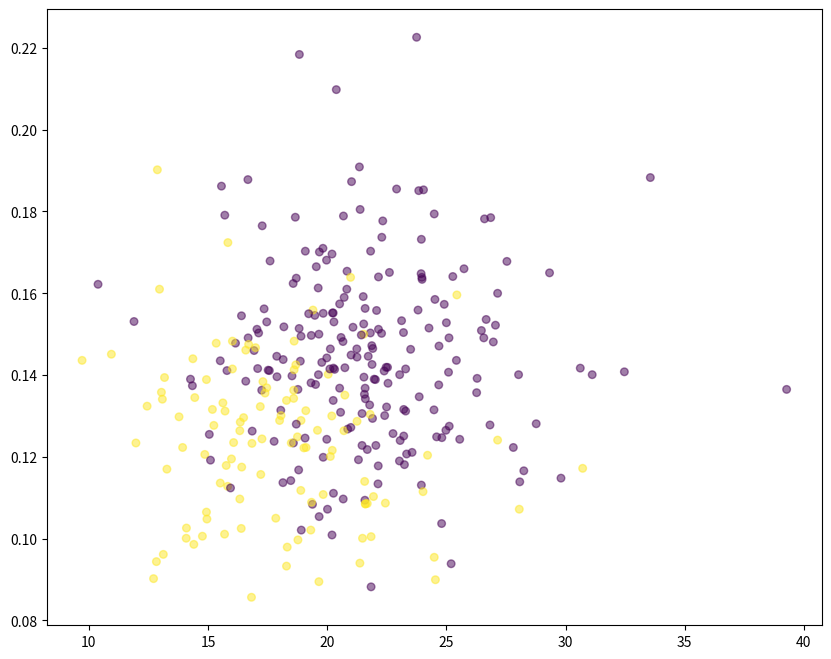

In [14]:
# 목표변수 산점도 확인
plt.figure(figsize=(10,8))
plt.scatter(df_raw['mean_texture'],df_raw['worst_smoothness'],c=df_raw['diagnosis'], s=30, alpha=0.5)
plt.show()

- 1의 데이터(노란색 점)의 데이터 개수가 더 적어보임

In [15]:
# Over-sampling 설정
sm = SMOTE(sampling_strategy='auto')

# train데이터를 이용한 Over-sampling
x_resampled, y_resampled = sm.fit_resample(df_train_x,df_train_y)

# 결과 확인
print('Over-Sampling 전:\n',df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y: {} \n'.format(y_resampled.shape))

print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전:
 0    115
1     77
Name: diagnosis, dtype: int64 

Over-Sampling 후 Train X: (230, 30)
Over-Sampling 후 Train Y: (230,) 

Over-Sampling 후 '1':115
Over-Sampling 후 '0':115


   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0       13.150         15.34           85.31      538.9          0.09384   
1       15.750         19.22          107.10      758.6          0.12430   
2       20.640         17.35          134.80     1335.0          0.09446   
3       15.710         13.93          102.00      761.7          0.09462   
4        9.667         18.49           61.49      289.1          0.08946   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.08498         0.09293              0.03483         0.1822   
1           0.23640         0.29140              0.12420         0.2375   
2           0.10760         0.15270              0.08941         0.1571   
3           0.09462         0.07135              0.05933         0.1816   
4           0.06258         0.02948              0.01514         0.2238   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0             

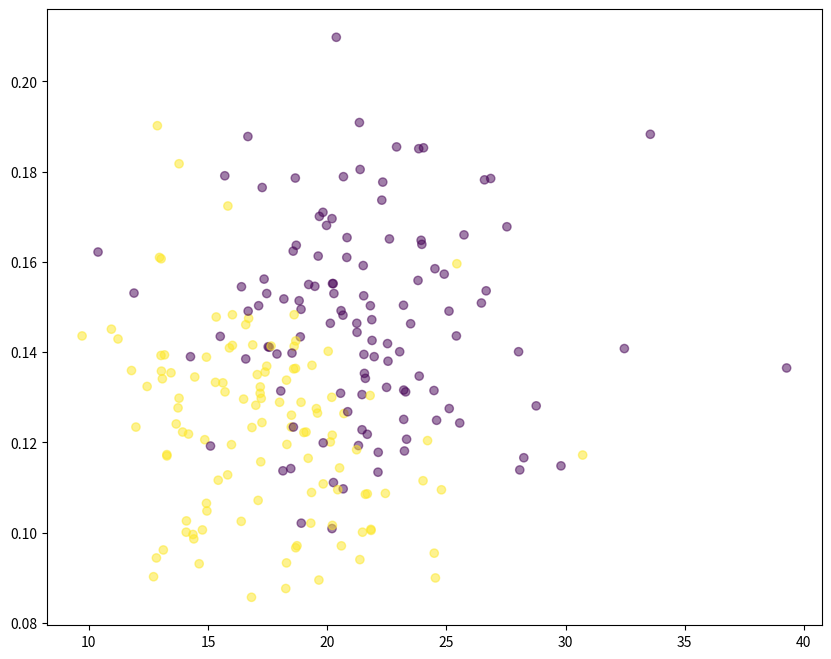

In [16]:
# 데이터 결합 및 산점도 확인
df_resampled = pd.concat([x_resampled,y_resampled], axis=1)
print(df_resampled.head())

# 목표변수 산점도 확인
plt.figure(figsize=(10,8))
plt.scatter(df_resampled['mean_texture'],df_resampled['worst_smoothness'],c=df_resampled['diagnosis'],alpha=0.5)
plt.show()

- 개수를 같게 맞춘 후 산점도의 데이터 양이 비슷해 보임

## 모델 생성 

### default model

In [17]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234 )
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.883


- 정확도는 train 100%, test 88.3%로 차이도 크고, train 모델은 과대적합

In [18]:
# 실행옵션 확인
print(tree_uncustomized.get_params().keys())
print(tree_uncustomized.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


- 디폴트 옵션 'min_samples_leaf'은 1, 'min_samples_split'은 2

### max_depth(최대 깊이) 조정에 따른 정확도 변화

In [19]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~15
para_depth = [depth for depth in range(1, 15)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [20]:
#조회할 최대깊이
para_depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [21]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

Depth  TrainAccuracy  TestAccuracy
0       1          0.932         0.852
1       2          0.979         0.875
2       3          0.995         0.875
3       4          1.000         0.883
4       5          1.000         0.883
5       6          1.000         0.883
6       7          1.000         0.883
7       8          1.000         0.883
8       9          1.000         0.883
9      10          1.000         0.883
10     11          1.000         0.883
11     12          1.000         0.883
12     13          1.000         0.883
13     14          1.000         0.883

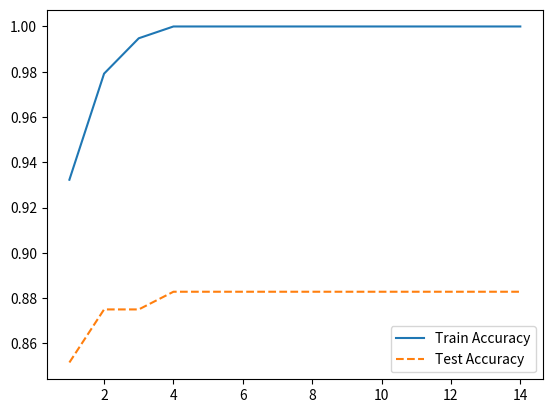

In [22]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

- 4 이후로 test 정확도는 증가하지 않고 train data도 과적합되어 있음을 알 수 있음 -> 과적합 방지를 위해 최대 깊이를 4로 선택

In [23]:
# 변수명 저장
v_feature_name = df_train_x.columns

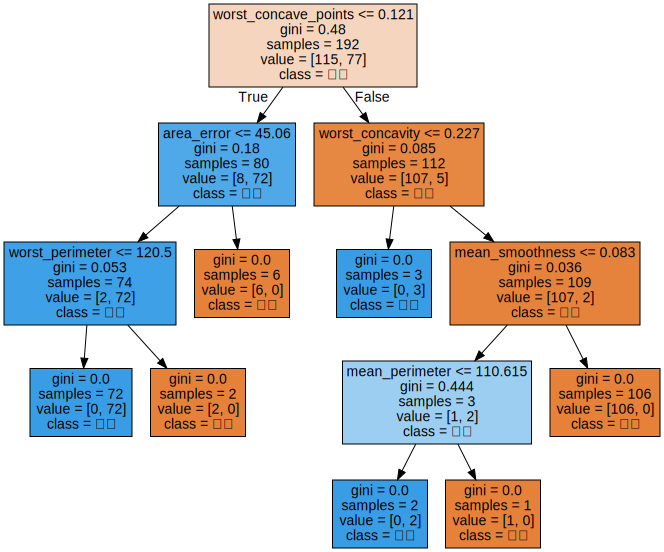

In [24]:
# 깊이가 4인 모델
tree_low = DecisionTreeClassifier(max_depth = 4, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장. (목표변수, 0: Good, 1: Bad)
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["음성", "양성"], # 목표변수 값이 숫자-> Label 직접 지정
                # class_names = tree_low.classes_,원래 목표변수 값이 법주형 -> 모델 keyword 사용           
                feature_names = v_feature_name, impurity = True, filled = True)
# graphviz를 이용해 트리 모델 시각화
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### min_samples_split(분리노드의 최소 샘플 수) 조정에 따른 정확도 변화

In [25]:
# Data 구조 확인
fun_data_layout(df_train_x)

Data 구조: (192, 30)

변수 :  Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')



In [26]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth=4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [27]:
para_split

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [28]:
# 모델 정확도 확인
df_accuracy_split.round(3)

MinSamplesSplit  TrainAccuracy  TestAccuracy
0               10          0.995         0.875
1               20          0.995         0.875
2               30          0.995         0.875
3               40          0.995         0.875
4               50          0.995         0.875
5               60          0.995         0.875
6               70          0.995         0.875
7               80          0.984         0.867
8               90          0.953         0.844
9              100          0.953         0.844

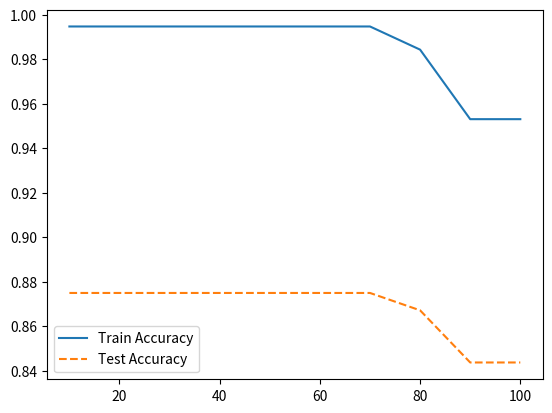

In [29]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

- 70 이후 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 설명력 대비 test 정확성이 더 큰 폭으로 떨어지기 때문에 70 선택

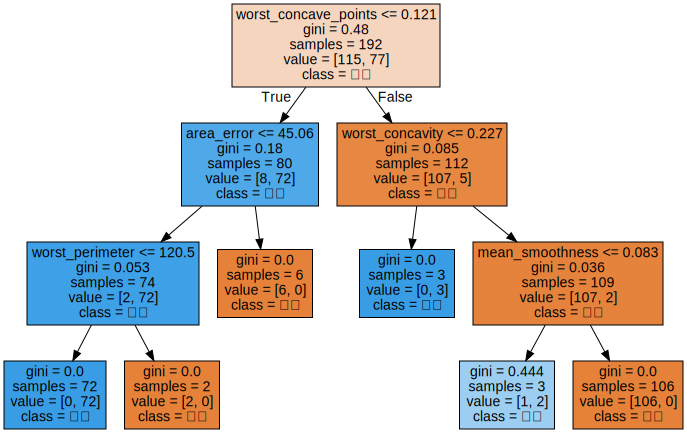

In [30]:
# 분리 노드의 최소 자료 수가 70인 모델
tree_low = DecisionTreeClassifier(max_depth = 4, min_samples_split=70, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["음성", "양성"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### min_samples_leaf(잎사귀 노드의 최소 샘플 수) 조정에 따른 정확도 변화

In [31]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수. 2~20
para_leaf = [n_leaf * 2 for n_leaf in range(1, 31)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=70, max_depth = 4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [32]:
para_leaf

[2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60]

In [33]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

MinSamplesLeaf  TrainAccuracy  TestAccuracy
0                2          0.995         0.875
1                4          0.974         0.891
2                6          0.964         0.875
3                8          0.958         0.898
4               10          0.953         0.914
5               12          0.943         0.906
6               14          0.932         0.898
7               16          0.932         0.852
8               18          0.932         0.852
9               20          0.932         0.852
10              22          0.932         0.852
11              24          0.932         0.852
12              26          0.932         0.852
13              28          0.932         0.852
14              30          0.932         0.852
15              32          0.932         0.852
16              34          0.932         0.852
17              36          0.932         0.852
18              38          0.932         0.852
19              40          0.932         0.852
20              42          0.932         0.852
21              44          0.932         0.852
22              46          0.932         0.852
23              48          0.932         0.852
24              50          0.932         0.852
25              52          0.932         0.852
26              54          0.932         0.852
27              56          0.932         0.852
28              58          0.932         0.852
29              60          0.932         0.852

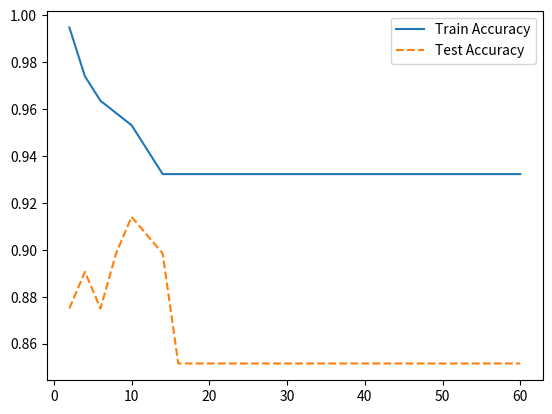

In [34]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

- 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며\
  train/test 데이터의 성능 변화를 고려하여 10 선택

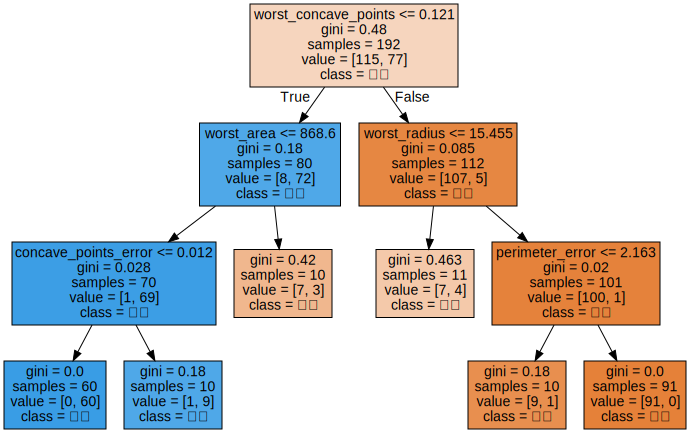

In [35]:
# 잎사귀의 최소 자료 수가 10인 모델
tree_low = DecisionTreeClassifier(max_depth=4, min_samples_split=70, min_samples_leaf=10, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file=" tree_low.dot", class_names = ["음성", "양성"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open(" tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 최종 모델 선정 / 시각화

In [36]:
tree_final = DecisionTreeClassifier(max_depth=4, min_samples_split=70, min_samples_leaf=10, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=70,
                       random_state=1234)

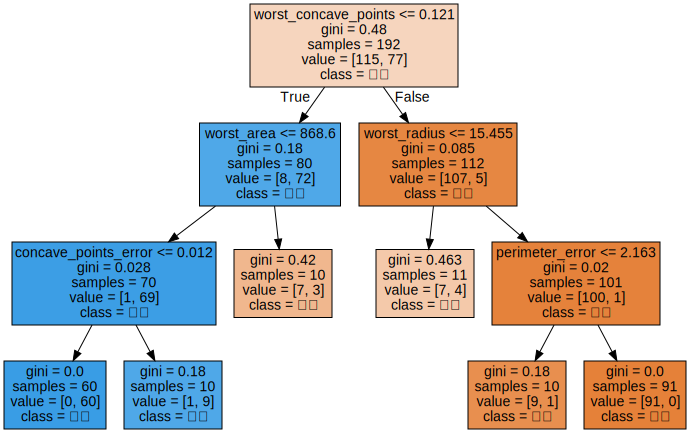

In [37]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["음성", "양성"],
# export_graphviz(tree_final, out_file="tree_final.dot", 
                feature_names = v_feature_name, impurity = True, filled = True)
# tree_final.dot 그리기
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [38]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.914

Confusion matrix: 
[[94  3]
 [ 8 23]]
              precision    recall  f1-score   support

           0      0.922     0.969     0.945        97
           1      0.885     0.742     0.807        31

    accuracy                          0.914       128
   macro avg      0.903     0.856     0.876       128
weighted avg      0.913     0.914     0.911       128



- raw data를 이용한 의사결정나무 정확도 91.4%
- f1-score 0.807

### 설명변수 중요도
* Importance는 상대적인 값
* Importance = 0 -> 적용 모델의 가지 분리시 해당 변수가 사용되지 않았다는 의미->다른 모델 생성 시에는 변경될 수 있음!!

In [39]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

Feature  Importance
27     worst_concave_points       0.861
23               worst_area       0.104
20             worst_radius       0.031
12          perimeter_error       0.002
17     concave_points_error       0.002
0               mean_radius       0.000
16          concavity_error       0.000
28           worst_symmetry       0.000
26          worst_concavity       0.000
25        worst_compactness       0.000
24         worst_smoothness       0.000
22          worst_perimeter       0.000
21            worst_texture       0.000
19  fractal_dimension_error       0.000
18           symmetry_error       0.000
15        compactness_error       0.000
1              mean_texture       0.000
14         smoothness_error       0.000
13               area_error       0.000
11            texture_error       0.000
10             radius_error       0.000
9    mean_fractal_dimension       0.000
8             mean_symmetry       0.000
7       mean_concave_points       0.000
6            mean_concavity       0.000
5          mean_compactness       0.000
4           mean_smoothness       0.000
3                 mean_area       0.000
2            mean_perimeter       0.000
29  worst_fractal_dimension       0.000

- 중요도가 0인 변수가 많아 0 이상인 변수만 출력하여 시각화하려고 함

In [40]:
#변수중요도가 0.0보다 높은 변수 출력

importance_list = df_importance[df_importance.Importance>0.0].Feature.values
print("변수중요도가 0.0보다 높은 변수는")

for i in importance_list:
    print("-",[i])

변수중요도가 0.0보다 높은 변수는
- ['worst_concave_points']
- ['worst_area']
- ['worst_radius']
- ['perimeter_error']
- ['concave_points_error']


In [41]:
#0 이상인 변수 중요도 저장
df_more_importance = df_importance[df_importance.Importance>0.0]

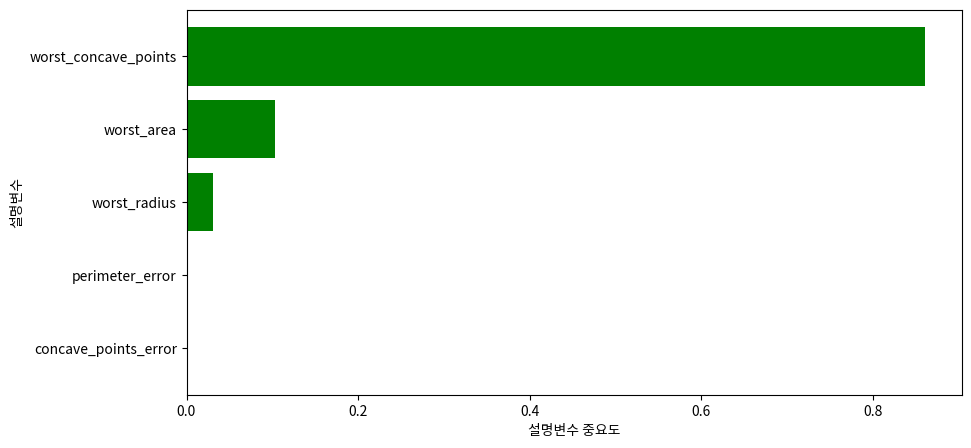

In [42]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_more_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_more_importance))

plt.figure(figsize=(10,5))
plt.barh(y = coordinates, width = df_more_importance["Importance"], color="g")
plt.yticks(coordinates, df_more_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수");

### Over-sampling Data이용한 모델링 및 평가

In [43]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x_over, df_test_x_over, df_train_y_over, df_test_y_over = train_test_split(
    x_resampled, y_resampled, test_size = 0.4, stratify=y_resampled, random_state = 1234) 

print("분할 전 데이터 현황... 설명:", x_resampled.shape, "  목표:", y_resampled.shape)
print("분할 후 설명변수 현황...Train:", df_train_x_over.shape, " Test:", df_test_x_over.shape)
print("분할 후 목표변수 현황...Train:", df_train_y_over.value_counts(), " Test:", df_test_y_over.value_counts())

분할 전 데이터 현황... 설명: (230, 30)   목표: (230,)
분할 후 설명변수 현황...Train: (138, 30)  Test: (92, 30)
분할 후 목표변수 현황...Train: 0    69
1    69
Name: diagnosis, dtype: int64  Test: 1    46
0    46
Name: diagnosis, dtype: int64


In [44]:
# 최종 모델의 hyper-parameter 이용
tree_final_over = DecisionTreeClassifier(max_depth=4, min_samples_split=70, min_samples_leaf = 10, random_state=1234)

# Over-sampling Data 지정
tree_final_over.fit(df_train_x_over, df_train_y_over)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=70,
                       random_state=1234)

In [55]:
# 평가
y_pred_over = tree_final_over.predict(df_test_x_over)
print("Accuracy: {0:.3f}\n".format(tree_final_over.score(df_test_x_over, df_test_y_over)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y_over, y_pred_over)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y_over, y_pred_over, digits=3))

Accuracy: 0.848

Confusion matrix: 
[[41  5]
 [ 9 37]]
              precision    recall  f1-score   support

           0      0.820     0.891     0.854        46
           1      0.881     0.804     0.841        46

    accuracy                          0.848        92
   macro avg      0.850     0.848     0.848        92
weighted avg      0.850     0.848     0.848        92



- over sampling한 데이터를 이용한 의사결정나무 정확도 84.8%
- f1-score 0.841

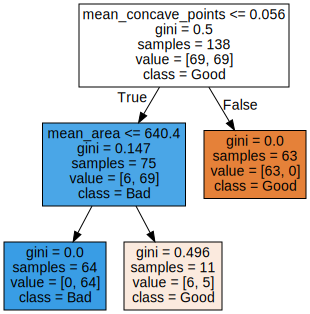

In [46]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final_over, out_file="tree_final_over.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_name, impurity = True, filled = True)
# tree_final.dot 그리기
with open("tree_final_over.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [47]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final_over.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

Feature  Importance
7       mean_concave_points       0.912
3                 mean_area       0.088
0               mean_radius       0.000
16          concavity_error       0.000
28           worst_symmetry       0.000
27     worst_concave_points       0.000
26          worst_concavity       0.000
25        worst_compactness       0.000
24         worst_smoothness       0.000
23               worst_area       0.000
22          worst_perimeter       0.000
21            worst_texture       0.000
20             worst_radius       0.000
19  fractal_dimension_error       0.000
18           symmetry_error       0.000
17     concave_points_error       0.000
15        compactness_error       0.000
1              mean_texture       0.000
14         smoothness_error       0.000
13               area_error       0.000
12          perimeter_error       0.000
11            texture_error       0.000
10             radius_error       0.000
9    mean_fractal_dimension       0.000
8             mean_symmetry       0.000
6            mean_concavity       0.000
5          mean_compactness       0.000
4           mean_smoothness       0.000
2            mean_perimeter       0.000
29  worst_fractal_dimension       0.000

In [48]:
#변수중요도가 0.0보다 높은 변수 출력

importance_list = df_importance[df_importance.Importance>0.0].Feature.values
print("변수중요도가 0.0보다 높은 변수는")

for i in importance_list:
    print("-",[i])

변수중요도가 0.0보다 높은 변수는
- ['mean_concave_points']
- ['mean_area']


In [49]:
#0 이상인 변수 중요도 저장
df_more_importance = df_importance[df_importance.Importance>0.0]

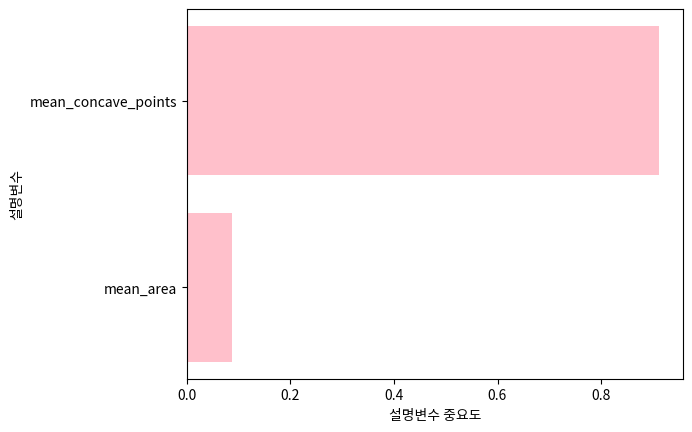

In [50]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_more_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_more_importance))
plt.barh(y = coordinates, width = df_more_importance["Importance"],color ="pink")
plt.yticks(coordinates, df_more_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수");

### GridSearch
* Tree 모델의 hyper-parameter의 최적값 탐색
* grid(값의 격자) 방식으로 값을 변경/조합하면서 모델의 성능 비교
* 반복 모델 생성시 CV(cross-validation) 방식으로 data 선택 -> 개별 모델과 최적값이 다를 수 있음  

#### raw data를 이용한 DecisionTree GridSearch

In [51]:
estimator = DecisionTreeClassifier()
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=50)

best parameter: 
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 50}

best score: 
0.948


#### oversampling한 데이터를 이용한 DecisionTree GridSearch

In [52]:
# 정확도가 높은 최적 parameter 찾기
grid_dt_over = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt_over.fit(df_train_x_over, df_train_y_over)

print("best estimator model: \n{}".format(grid_dt_over.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt_over.best_params_))
print("\nbest score: \n{}".format(grid_dt_over.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=10)

best parameter: 
{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10}

best score: 
0.963


In [53]:
print("raw data를 이용한 DecisionTree Model Accuracy: {0:.4f}\n".format(grid_dt.best_score_))
print("oversampling한 데이터를 이용한 DecisionTree Model Accuracy: {0:.4f}\n".format(grid_dt_over.best_score_))

raw data를 이용한 DecisionTree Model Accuracy: 0.9478

oversampling한 데이터를 이용한 DecisionTree Model Accuracy: 0.9635



## 결론

### 똑같은 hyper-parameter 이용하여 만든 의사결정나무의 비교

- raw data를 이용한 의사결정나무 정확도 91.4%, f1-score 0.807
- over sampling한 데이터를 이용한 의사결정나무 정확도 84.8%, f1-score 0.841

raw data가 양성 대 음성 비율이 약 1:2 정도인 불균형 데이터였다. 그래서 raw data를 이용한 decision tree model의 정확도가 91.4로 높게 나왔지만 f1-score는 0.807로 over sampling data를 이용한 decision tree보다 더 낮은 모습을 보였다. 심한 불균형 데이터의 경우 데이터의 손실이 있으면 안되는지(down sampling), 과적합이 되면 안되는지(over sampling의 경우)를 고려하여 데이터를 먼저 처리해주고 모델학습에 이용해야겠다고 생각했다.

### grid search한 의사결정나무 비교

- raw data를 이용한 DecisionTree Model Accuracy: 0.9478
- oversampling한 데이터를 이용한 DecisionTree Model Accuracy: 0.9635

gird seach를 한 모델의 정확도는 oversampling한 데이터를 이용한 DecisionTree Model의 정확도가 약 0.964로 raw data를 이용한 DecisionTree Model보다 더 높게 나왔는데,\
grid search를 하여 적합시킨 두 모델을 보면 초매개변수('max_depth', 'min_samples_leaf','min_samples_split')의 값이 다르다. 또 가장 큰 차이점은 grid search의 교차검증을 통해 특정 평가 데이터 셋에 overfit 되는 것이 방지되었기 때문에 불균형 데이터를 그대로 사용하는 것보다 처리 후 데이터를 사용하는 것이 더 높게 나왔을 것이라고 생각한다.

### 시각화

In [63]:
cp = {'raw data' : [0.914, 0.807, 0.948], 'over sampling' : [0.848, 0.841, 0.964]}
comparision = pd.DataFrame(cp)
comparision.index = ['same_parameter_accuracy','same_parameter_F1score','grid_search']
comparision

raw data  over sampling
same_parameter_accuracy     0.914          0.848
same_parameter_F1score      0.807          0.841
grid_search                 0.948          0.964

<AxesSubplot:>

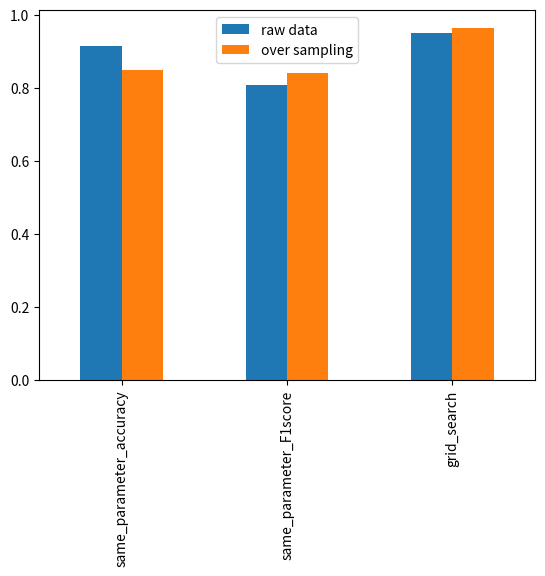

In [64]:
comparision.plot.bar()

- 똑같은 hyper-parameter 이용하여 만든 의사결정나무 중에는 클래스가 불균형한 raw data를 이용한 모델의 정확성이 더 높았으나 f1-score는 낮은 모습을 보임
- gridsearch한 모델은 불균형데이터를 oversampling 처리한 데이터를 이용한 모델이 더 높은 정확성을 보임

# < 랜덤포레스트 >

앞에서 전처리한 데이터를 사용하겠습니다.

## 모델 생성
### default model

In [67]:
# 랜덤 포레스트 모델 생성: RandomForestClassifier
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.922


- 정확도는 train 100%, test 92.2%로 차이도 크고, train 모델은 과대적합

In [68]:
# 실행옵션 확인
print(rf_uncustomized.get_params().keys())
print(rf_uncustomized.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 1234, 0, False])


### n_estimators(생성 트리 수) 조정에 따른 정확도 변화

In [74]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경: 1~150
para_n_tree = [n_tree * 10 for n_tree in range(1, 22)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [75]:
# 조회할 트리수
para_n_tree

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210]

In [76]:
# 트리 수에 따른 모델 정확도 확인
df_accuracy_n.round(3)

n_estimators  TrainAccuracy  TestAccuracy
0             10          1.000         0.922
1             20          0.995         0.906
2             30          1.000         0.914
3             40          1.000         0.914
4             50          1.000         0.922
5             60          1.000         0.922
6             70          1.000         0.914
7             80          1.000         0.914
8             90          1.000         0.922
9            100          1.000         0.922
10           110          1.000         0.922
11           120          1.000         0.930
12           130          1.000         0.930
13           140          1.000         0.930
14           150          1.000         0.930
15           160          1.000         0.922
16           170          1.000         0.922
17           180          1.000         0.922
18           190          1.000         0.922
19           200          1.000         0.922
20           210          1.000         0.922

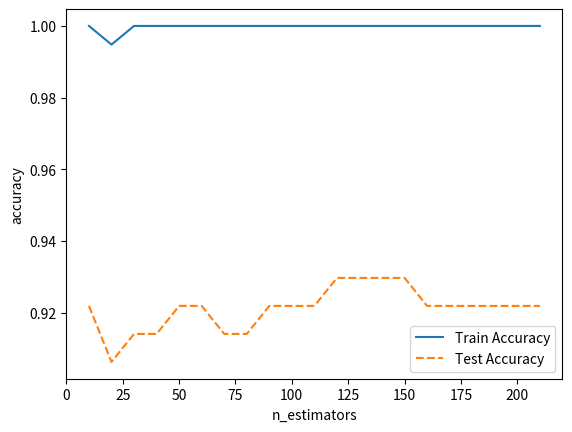

In [77]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend();

- 결정 트리 수가 증가하면 모델의 정확도는 증가하며 train 모델의 정확도는 25 이상에서는 100%로 과적합이 이루어지며\
  test 모델은 변동이 있지만 120까지 증가하는 경향 있음, 50또는 120 선택
- OOB를 이용한 적정 나무 확인

#### n_estimators: 트리의 개수 변경 시 모델의 oob error 변화

In [80]:
# error 저장 리스트
oob_error = []

for v_n_estimator in range(1, 151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state= 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

Text(0.5, 0, 'n_estimators')

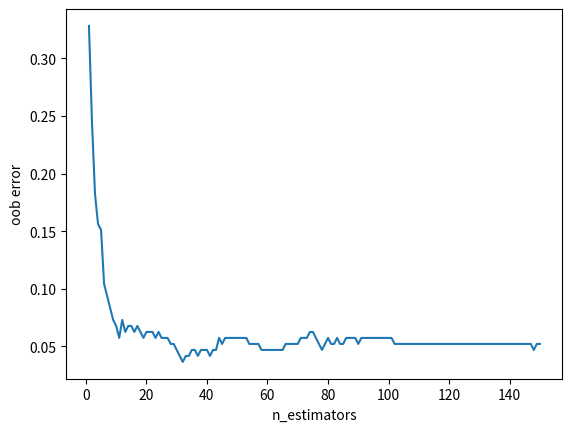

In [81]:
# 그래프로 표현
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [82]:
# 다른 매개변수들의 영향을 보기 위해 임의로 지정
n_estimators = 100

### max_depth(최대 깊이) 조정에 따른 정확도 변화

In [87]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators=100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [88]:
para_depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [89]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

Depth  TrainAccuracy  TestAccuracy
0      1          0.953         0.922
1      2          0.974         0.906
2      3          0.990         0.906
3      4          1.000         0.914
4      5          1.000         0.922
5      6          1.000         0.922
6      7          1.000         0.922
7      8          1.000         0.922
8      9          1.000         0.922
9     10          1.000         0.922

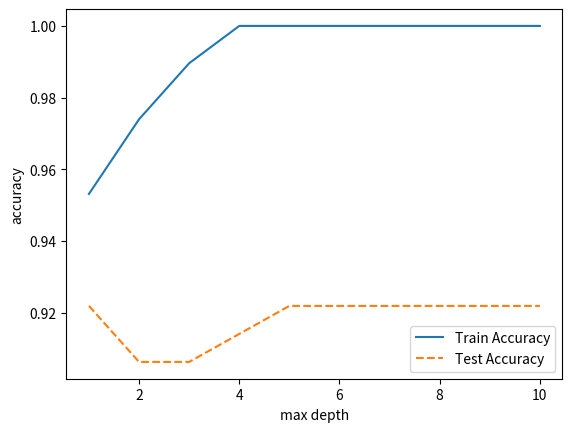

In [90]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend();

- 최대 깊이 증가에 따라 모델의 정확도는 증가하다 5 이후로 설명력과 test 정확성이 변동이 거의 없어보여 5 선택

### min_samples_split(분할 노드의 최소 샘플 수) 조정에 따른 정확도 변화

In [106]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수. 10~100
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth=5,
                                n_estimators=100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [107]:
para_split

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [108]:
# 테이블 결과
df_accuracy_split.round(3)

MinSamplesSplit  TrainAccuracy  TestAccuracy
0               10          0.990         0.906
1               20          0.984         0.914
2               30          0.984         0.914
3               40          0.979         0.906
4               50          0.984         0.906
5               60          0.964         0.891
6               70          0.953         0.898
7               80          0.953         0.922
8               90          0.953         0.922
9              100          0.953         0.922

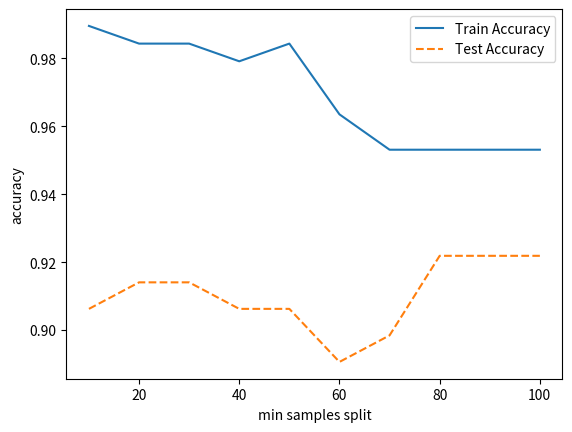

In [109]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend();

- 분리 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하나 test 정확성은 60이후 약간의 상승을 보였다. 따라서 80 선택

### min_samples_leaf(최소 잎사귀 수) 조정에 따른 정확도 변화

In [110]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 5 for n_leaf in range(1, 17)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,min_samples_split =80,
                                max_depth=5, n_estimators=100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [111]:
para_leaf

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

In [112]:
# 테이블 결과
df_accuracy_leaf.round(3)

MinSamplesLeaf  TrainAccuracy  TestAccuracy
0                5          0.953         0.922
1               10          0.953         0.922
2               15          0.953         0.922
3               20          0.948         0.922
4               25          0.948         0.922
5               30          0.948         0.922
6               35          0.953         0.922
7               40          0.953         0.922
8               45          0.953         0.914
9               50          0.964         0.914
10              55          0.943         0.898
11              60          0.943         0.922
12              65          0.599         0.758
13              70          0.599         0.758
14              75          0.599         0.758
15              80          0.599         0.758

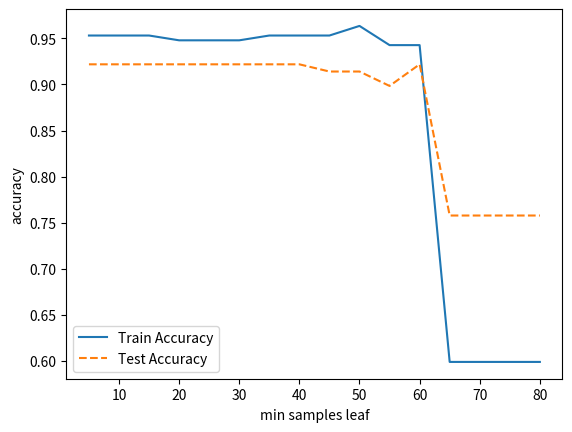

In [113]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend();

- train과 test 모두 60까지 약간의 변동을 보이다가 60 이후로 정확도가 갑자기 떨어지는 경향을 보인다. train과 test의 차이가 크지 않은 20으로 선택

## 최종 모델

In [114]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf=20, max_depth=15, n_estimators=100,min_samples_split =80,
                                  random_state=1234)
rf_final.fit(df_train_x, df_train_y)
# 평가
y_pred = rf_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.948
Accuracy on test set: 0.922

Confusion matrix: 
[[93  4]
 [ 6 25]]
              precision    recall  f1-score   support

           0      0.939     0.959     0.949        97
           1      0.862     0.806     0.833        31

    accuracy                          0.922       128
   macro avg      0.901     0.883     0.891       128
weighted avg      0.921     0.922     0.921       128



- test set에 대한 정확도 92.2%
- f1-score 0.833

### 설명변수 중요도

In [116]:
# 변수명
v_feature_names = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

Feature  Importance
22          worst_perimeter       0.173
7       mean_concave_points       0.140
27     worst_concave_points       0.123
6            mean_concavity       0.121
20             worst_radius       0.100
23               worst_area       0.080
2            mean_perimeter       0.060
26          worst_concavity       0.059
0               mean_radius       0.040
3                 mean_area       0.040
13               area_error       0.020
5          mean_compactness       0.019
17     concave_points_error       0.014
12          perimeter_error       0.010
9    mean_fractal_dimension       0.001
10             radius_error       0.000
1              mean_texture       0.000
21            worst_texture       0.000
25        worst_compactness       0.000
24         worst_smoothness       0.000
28           worst_symmetry       0.000
15        compactness_error       0.000
19  fractal_dimension_error       0.000
18           symmetry_error       0.000
16          concavity_error       0.000
14         smoothness_error       0.000
11            texture_error       0.000
8             mean_symmetry       0.000
4           mean_smoothness       0.000
29  worst_fractal_dimension       0.000

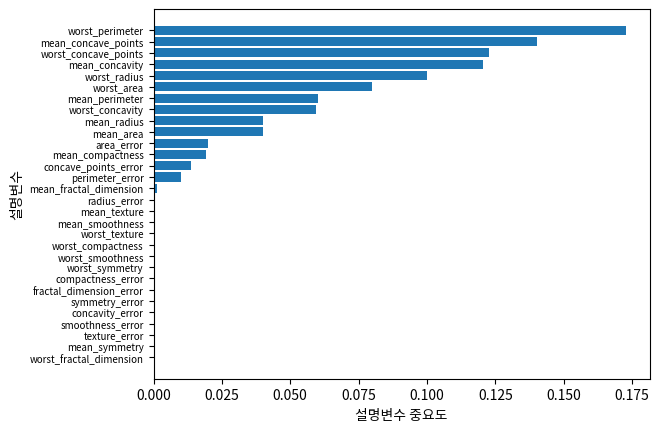

In [117]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"], size = 7)
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수");

- 중요도가 0인 변수가 많아 0 이상인 변수만 출력하여 시각화하려고 함

In [118]:
#변수중요도가 0.0보다 높은 변수 출력

importance_list = df_importance[df_importance.Importance>0.0].Feature.values
print("변수중요도가 0.0보다 높은 변수는")

for i in importance_list:
    print("-",[i])

변수중요도가 0.0보다 높은 변수는
- ['mean_texture']
- ['radius_error']
- ['mean_fractal_dimension']
- ['perimeter_error']
- ['concave_points_error']
- ['mean_compactness']
- ['area_error']
- ['mean_area']
- ['mean_radius']
- ['worst_concavity']
- ['mean_perimeter']
- ['worst_area']
- ['worst_radius']
- ['mean_concavity']
- ['worst_concave_points']
- ['mean_concave_points']
- ['worst_perimeter']


In [119]:
#0 이상인 변수 중요도 저장
df_more_importance = df_importance[df_importance.Importance>0.0]

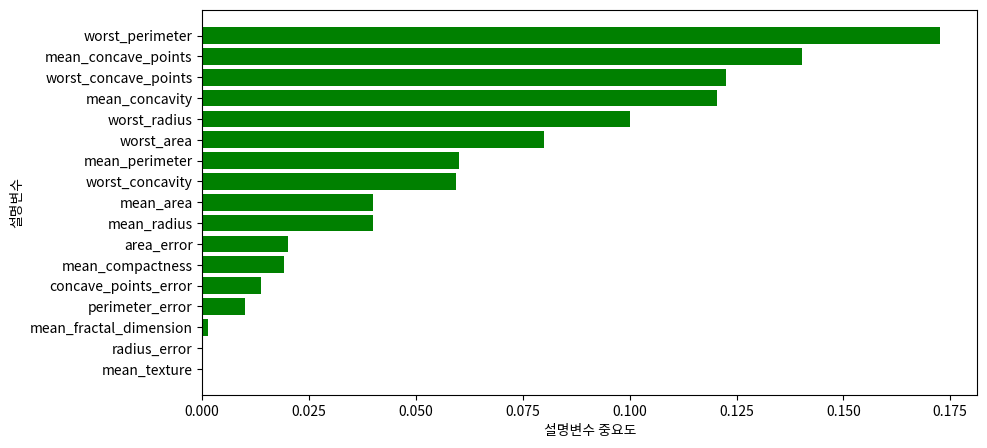

In [120]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_more_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_more_importance))

plt.figure(figsize=(10,5))
plt.barh(y = coordinates, width = df_more_importance["Importance"], color="g")
plt.yticks(coordinates, df_more_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수");

- 트리 생성 시 (세포)평균 둘레 중 제일 큰 3개의 평균, (세포)평균 오목한 점의 수, (세포)평균 오목한 점의 수 중 제일 큰 3개의 평균 순으로 영향도가 크다고 해석할 수 있음

### Over-sampling Data이용한 모델링 및 평가

In [124]:
# 최종 모델의 hyper-parameter 이용
rf_final_over = RandomForestClassifier(min_samples_leaf=20, max_depth=15, n_estimators=100,min_samples_split =80,
                                  random_state=1234)

# Over-sampling Data 지정
rf_final_over.fit(df_train_x_over, df_train_y_over)

RandomForestClassifier(max_depth=15, min_samples_leaf=20, min_samples_split=80,
                       random_state=1234)

In [125]:
# 평가
y_pred_over = rf_final_over.predict(df_test_x_over)
print("Accuracy: {0:.3f}\n".format(rf_final_over.score(df_test_x_over, df_test_y_over)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y_over, y_pred_over)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y_over, y_pred_over, digits=5))

Accuracy: 0.913

Confusion matrix: 
[[42  4]
 [ 4 42]]
              precision    recall  f1-score   support

           0    0.91304   0.91304   0.91304        46
           1    0.91304   0.91304   0.91304        46

    accuracy                        0.91304        92
   macro avg    0.91304   0.91304   0.91304        92
weighted avg    0.91304   0.91304   0.91304        92



- test set에 대한 정확도 91.3%, f1-score 0.913

In [126]:
print("oversampling 전 random forest model Accuracy: {0:.5f}\n".format(grid_rf.best_score_))
print("oversampling 후 random forest model Accuracy: {0:.5f}\n".format(rf_final_over.score(df_test_x_over, df_test_y_over)))

oversampling 전 random forest model Accuracy: 0.95317

oversampling 후 random forest model Accuracy: 0.91304



### GridSearchCV를 이용한 최적 parameter 찾기

#### raw data를 이용한 RandomForest  GridSearch

In [129]:
estimator = RandomForestClassifier(n_estimators=100,random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth,
              "min_samples_leaf": para_leaf,
              "min_samples_split":para_split}
# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=1, min_samples_leaf=35, min_samples_split=10,
                       random_state=1234)

best parameter: 
{'max_depth': 1, 'min_samples_leaf': 35, 'min_samples_split': 10}

best score: 
0.953


- raw data RandomForest : grid search로 찾은 최적 파라미터는 최대깊이 1, 최소 샘플 개수 35, 분할 노드의 최소 샘플 수 10이고 교차검증으로 찾은 정확도 평균은 95.3%임을 알 수 있음

#### oversampling한 데이터를 이용한 RandomForest GridSearch

In [130]:
estimator = RandomForestClassifier(n_estimators=100,random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth,
              "min_samples_leaf": para_leaf,
              "min_samples_split":para_split}
# 정확도가 높은 최적 parameter 찾기
grid_rf_over = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf_over.fit(df_train_x_over, df_train_y_over)

print("best estimator model: \n{}".format(grid_rf_over.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf_over.best_params_))
print("\nbest score: \n{}".format(grid_rf_over.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=1, min_samples_leaf=25, min_samples_split=10,
                       random_state=1234)

best parameter: 
{'max_depth': 1, 'min_samples_leaf': 25, 'min_samples_split': 10}

best score: 
0.941


- over sampling RandomForest : grid search로 찾은 최적 파라미터는 최대깊이 1, 최소 샘플 개수 25, 분할 노드의 최소 샘플 수 10이고 교차검증으로 찾은 정확도 평균은 94.1%임을 알 수 있음

In [131]:
print("raw data를 이용한 RandomForest Model Accuracy: {0:.4f}\n".format(grid_rf.best_score_))
print("oversampling한 데이터를 이용한 RandomForest Model Accuracy: {0:.4f}\n".format(grid_rf_over.best_score_))

raw data를 이용한 RandomForest Model Accuracy: 0.9532

oversampling한 데이터를 이용한 RandomForest Model Accuracy: 0.9413



## 결론

### 똑같은 hyper-parameter 이용하여 만든 랜덤포레스트의 비교

- raw data를 이용한 랜덤포레스트 정확도 92.2%, f1-score 0.833
- over sampling한 데이터를 이용한 랜덤포레스트 정확도 91.3%, f1-score 0.913

raw data가 양성 대 음성 비율이 약 1:2 정도인 불균형 데이터였다. 그래서 raw data를 이용한 RandomForest model의 정확도가 91.4로 높게 나왔지만 f1-score는 0.807로 over sampling data를 이용한 RandomForest보다 더 낮은 모습을 보였다. 심한 불균형 데이터의 경우 데이터의 손실이 있으면 안되는지(down sampling), 과적합이 되면 안되는지(over sampling의 경우)를 고려하여 데이터를 먼저 처리해주고 모델학습에 이용해야겠다고 생각했다.

### grid search한 랜덤포레스트 비교

- raw data를 이용한 RandomForest Model Accuracy: 0.953
- oversampling한 데이터를 이용한 RandomForest Model Accuracy: 0.941
>gird seach를 한 모델의 정확도는 raw data를 이용한 RandomForest Model의 정확도가 약 0.953로 oversampling한 데이터를 이용한 RandomForest Model보다 더 높게 나왔는데, decision tree의 결과와 반대이다.\
먼저 grid search를 하여 적합시킨 두 모델을 보면 초매개변수('min_samples_leaf')의 값도 다르지만, oversampling 데이터 처리의 효과보다 여러 트리모델을 이용했기 때문에 decision tree model보다 과적합이 일어난 것 같다.

### 시각화

In [132]:
cp2 = {'raw data' : [0.922,0.833,0.953], 'over sampling' : [0.913,0.913,0.941]}
comparision2 = pd.DataFrame(cp2)
comparision2.index = ['same_parameter_accuracy','same_parameter_F1score','grid_search']
comparision2

raw data  over sampling
same_parameter_accuracy     0.922          0.913
same_parameter_F1score      0.833          0.913
grid_search                 0.953          0.941

<AxesSubplot:>

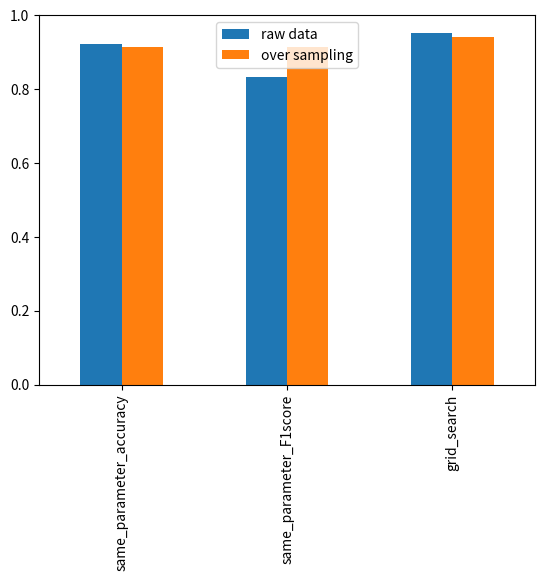

In [133]:
comparision2.plot.bar()

- 똑같은 hyper-parameter 이용하여 만든 랜덤포레스트 중에는 클래스가 불균형한 raw data를 이용한 모델의 정확성이 더 높았으나 f1-score는 낮은 모습을 보임
- gridsearch한 모델 또한 raw data를 이용한 모델이 더 높은 정확성을 보임 -> 랜덤포레스트 모델이 train data에 대해 과학습한 것 같음

# 의사결정나무와 랜덤포레스트 결과 비교
grid search로 hyper parameter가 정해진 모델의 결과를 비교하겠습니다.

In [135]:
cp3 = {'Decision Tree':[0.948,0.964],'Random Forest':[0.953,0.941]}
comparision3 = pd.DataFrame(cp3)
comparision3.index = ['raw data', 'over sampling data']
comparision3

Decision Tree  Random Forest
raw data                    0.948          0.953
over sampling data          0.964          0.941

<AxesSubplot:>

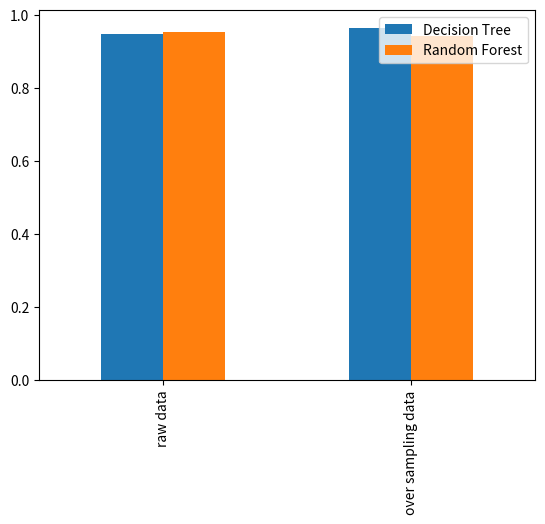

In [150]:
comparision3.plot.bar()

- raw data와 over sampling data에 대해 서로 반대의 결과를 보임